In [1]:
using LinearAlgebra
using Statistics
using Plots

In [2]:
# helper methods
function symetric_matrix(dim::Integer, show_matrix=false::Bool)::Matrix
    A = ones(dim,dim);
    for i = 1:dim
        for j = 1:dim
            A[i,j] = rand(1:50);
            A[j,i] = A[i,j];
        end
    end
    if show_matrix
        display(A);
    end
    return A;
end

# we might change it to just rand(dim,dim)
function random_matrix(dim::Integer, show_matrix=false::Bool)::Matrix
    A = ones(dim, dim);
    for i = 1:dim
        for j = 1:dim
            A[i,j] = rand(1:50);
        end
    end
    if show_matrix
        display(A);
    end
    return A
end

function diagonal_matrix(dim::Integer)::Matrix
    Diag = ones(dim,dim)
    return Diagonal(Diag)
end

function custom_cond(λₘₐₓ, λₘᵢₙ)
    return sqrt(λₘₐₓ/λₘᵢₙ)
end

custom_cond (generic function with 1 method)

# Metoda potęgowa

Poniżej przygotowana jest funkcja do metody iteracji prostej (metoda potęgowa), dzięki której można wyznaczyć największą co do modułu wartość własną, czyli promień spektralny macierzy, który opisany jest wzorem:
## $$\rho(A) = |\lambda_{max}| = \lim_{i \to \infty} \frac{||t_{i+1}||_{\infty}}{||t_{i}||_{\infty}}$$

Przy założeniu, że dowolny wektor początkowy t_{0} != 0, do uzyskania promienia spektralnego prowadzą iteracje postaci:
## $$t_{i+1} = At_{i},\ i=0,1,2...$$



In [3]:
function power_eigen(A::Matrix, iterations::Integer)::Array
    n = size(A, 1);
    X = ones(n,1);
    X1 = X;
    
    for i = 1:iterations
        X1 = X;
        X = A * X;
        X = X / norm(X);
    end
    return X' * A * X1 / (X' * X1);
end

function power_eigen_min(A::Matrix, iterations::Integer)::Array
    n = size(A, 1);
    X = ones(n,1);
    X1 = X;
    for i = 1:iterations
        X1 = X;
        X = A \ X;
        X = X / norm(X);
    end

    return X' * A * X1 / (X' * X1);
end

power_eigen_min (generic function with 1 method)

In [4]:
A = symetric_matrix(5);
#A = random_matrix(5);
#A = [22 21 -8 4; 21 49 11 39; -8 11 60 -19; 4 39 -19 135]
@time λₘₐₓ = power_eigen(A, 10);
display(λₘₐₓ);
e, v = eigen(A);
display(e);

1×1 Array{Float64,2}:
 147.61017227067327

5-element Array{Float64,1}:
 -41.96217473853549
 -17.191216915319853
  15.3200304432713
  63.223188691704216
 147.61017251887972

  2.917829 seconds (6.63 M allocations: 322.229 MiB, 5.75% gc time)


Jak widać z wyniku wykonania powyższego kodu, uzyskaliśmy największą co do modułu wartość własną macierzy. Ta wartość zgadza sięz wartością otrzymaną za pomocą metody eigen(A). Za pomocą metody potęgowej można również wyznaczyć najmniejszą co do modułu wartość własną macierzy. Korzysta się z twierdzenia dotyczącego przesunięcia spektrum macierzy:<br />
### "Jeżeli $\lambda$ jest wartością własną macierzy A, to $\lambda + r$ jest wartością własną macierzy $A + \tau I$"
Należy pamiętać, że twierdzenie ma zastosowanie dla macierzy symetrycznych i dodatnio określonych. Po zastosowaniu przesunięcia $B = A - \lambda_{max}I$ można ponownie zastosować metodę iteracji prostej dla macierzy B zbieżną do największej co do modułu wartości własnej $\lambda = \lambda_{min}-\lambda_{max}$. Stąd można wyznaczyć $\lambda_{min}$.

In [5]:
#Diag = diagonal_matrix(size(A,1))
#B = @. A - λₘₐₓ * Diag
#λ = power_eigen(B, 10);
#λₘᵢₙ = λ + λₘₐₓ
#print(λₘᵢₙ)
λₘᵢₙ = power_eigen_min(A,10)

1×1 Array{Float64,2}:
 15.545331094139376

Mając największą i najmniejszą wartość własną macierzy, można wyznaczyć współczynnik uwarunkowania macierzy:
$$cond(A)=\sqrt{\frac{\lambda_{max}(A^TA)}{\lambda_{min}(A^TA)}}$$
We wzorze przyjęto, że macierz A jest symetryczna, co oznacza, że $A=A^T$, ewentualnie można macierz wejściową doprowadzić do postaci symetrycznej stosując wzór $B = A^TA$

In [6]:
value = custom_cond(λₘₐₓ, λₘᵢₙ)
print(value)

cond(A)


[3.081471499976522]

9.635109608004164

# Metoda Jacobiego

In [7]:
function jacobi_eigen(A::Matrix, iterations::Integer)
    n = size(A,1);
    for i = 1:iterations
        s,t = maxst(A);
        
        d = √((A[s,s] - A[t,t])^2 + 4 * A[s,t]^2);
        sin2t = 2 * A[s,t] / d;
        cos2t = (A[s,s] - A[t,t]) / d;
        dt = √(2 * (1 + cos2t));
        sint = abs(sin2t) / dt;
        cost = abs((1 + cos2t) / dt);
        cost = sign(A[s,t]) * cost;

        R = diagonal_matrix(n);
        R[s,s] = cost;
        R[t,t] = cost;
        R[s,t] = -sint;
        R[t,s] = sint;
        
        A = R' * A * R; 
        
    end
    return A
end

function maxst(A::Matrix)
    s = 1;
    t = 2;
    n = size(A,1);
    for c = 2:n
        for r = 1:c-1
            if abs(A[r,c]) > abs(A[s,t])
                s = r;
                t = c;
            end
        end
    end
    return s, t
end

maxst (generic function with 1 method)

In [55]:
#F = [12 6 -6 1; 6 16 2 100; -6 2 16 1 ;1 100 1 4];
#F = rand(4,4);
F = symetric_matrix(5)
@time FJ = jacobi_eigen(F, 15);
#FJ[abs.(FJ) .< 1e-10] .= 0.0;
n = size(FJ,1);
for i = 1:n
    for j = 1:n
        if i != j
            FJ[i,j] = 0.0;
        end
    end
end
#display(maximum(abs, FJ))

display(FJ)
e,v = eigen(F);
display(e)


5×5 Array{Float64,2}:
 169.079   0.0      0.0      0.0         0.0
   0.0    47.5775   0.0      0.0         0.0
   0.0     0.0     17.6459   0.0         0.0
   0.0     0.0      0.0     -0.852331    0.0
   0.0     0.0      0.0      0.0       -23.4502

5-element Array{Float64,1}:
 -23.453806407729864
  -0.8526727853477745
  17.64598797181547
  47.5810612766454
 169.07942994461652

  0.000041 seconds (75 allocations: 18.750 KiB)


# QR

# Wykresy

In [52]:
PlotA = symetric_matrix(10);
plot_iterations = 15;
x = 1:plot_iterations;
results_power = zeros(0);
results_jacobi = zeros(0);
results_eig = zeros(0);

e, v = eigen(PlotA);
eigen_lambda = maximum(abs, e);

for i = 1:plot_iterations
    val = power_eigen(PlotA,i);
    append!(results_power, val);

    PlotAJ = jacobi_eigen(PlotA, i);
    val = maximum(abs, PlotAJ)
    append!(results_jacobi, val);

    append!(results_eig, eigen_lambda)

end

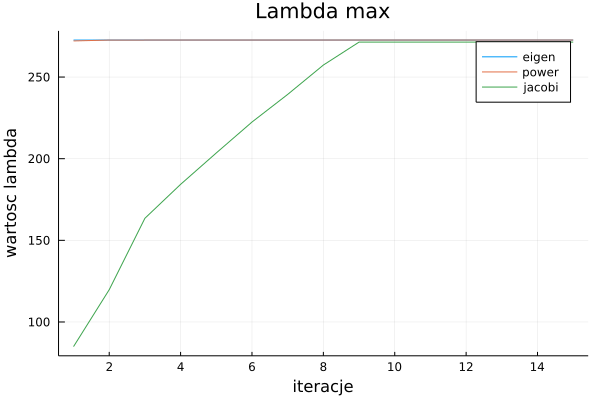

In [53]:
results = hcat(results_eig, results_power, results_jacobi);
plot_all = plot(x, results, title= "Lambda max", label=["eigen" "power" "jacobi"], xlabel="iteracje", ylabel="wartosc lambda")

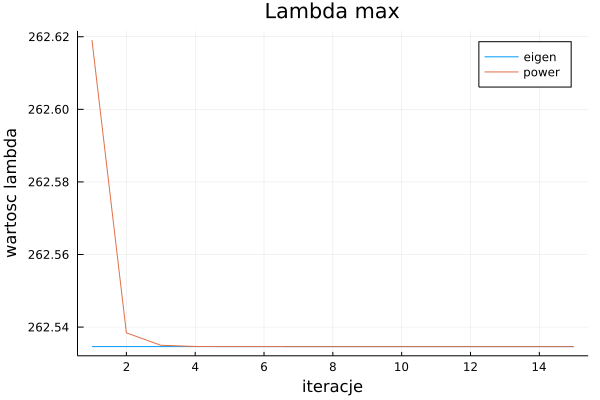

In [49]:
results = hcat(results_eig, results_power);
plot_power = plot(x, results, title= "Lambda max", label=["eigen" "power"], xlabel="iteracje", ylabel="wartosc lambda")

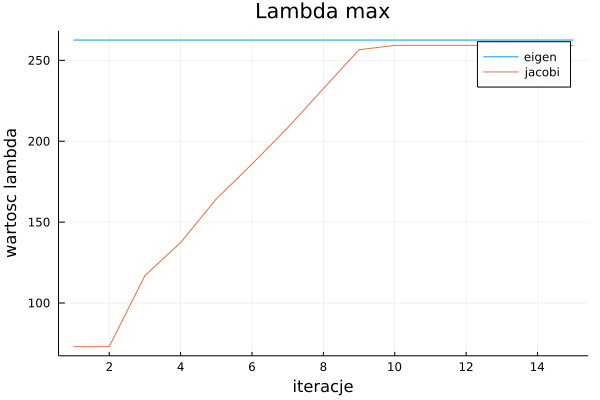

In [50]:
results = hcat(results_eig, results_jacobi);
plot_jacobi = plot(x, results, title= "Lambda max", label=["eigen" "jacobi"], xlabel="iteracje", ylabel="wartosc lambda")